# PyTorch Workflow Fundamentals

In [1]:
what_were_covering={1:"data (prepare and load)",
                    2:"build model",
                    3:"fitting the model to data (training)",
                    4:"making predictions and evaluating a model (inference)",
                    5:"saving and loading a model",
                    6:"putting it all together"
                   }

In [2]:
import torch
from torch import nn # contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.2.2+cpu'

## Data (preparing and loading)

### Machine learning is a game of two parts
1. Turn your data, whatever it is, into numbers (a representation).
2. Pick or build a model to learn the representation as best as possible.

In [3]:
# Create known parameters
weight=0.7
bias=0.3

# Create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Train Test Split

In [4]:
train_split=int(0.8*len(X))
X_train, y_train=X[:train_split],y[:train_split]
X_test, y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})

In [6]:
# plot_predictions()

## Build model

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# PyTorch model building essentials

## torch.nn, torch.optim, torch.utils.data.Dataset, torch.utils.data.DataLoader
1. torch.nn: contains all of the building blocks for computational graphs.
2. torch.nn.Parameter: Stores tensors that can be used with nn.Module.
3. torch.nn.Module: THe base class for all neural network modules.
4. torch.optim: Contains various optimization algorithms.
5. def forward(): All nn.Module subclasses requires a forwar() method, this defines the computation that will take place on the data passed to the particular nn.Module.

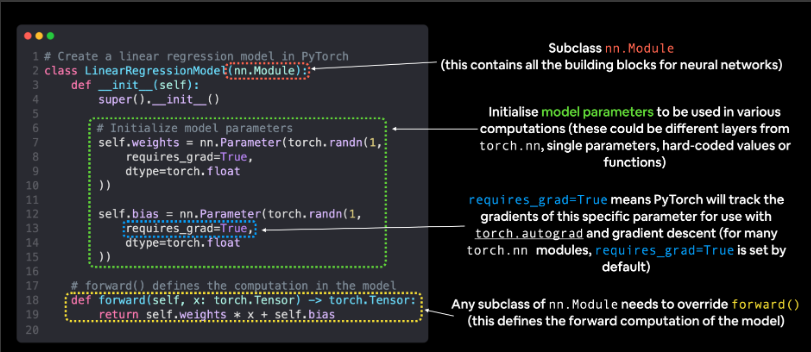

In [8]:
torch.manual_seed(42)

model_0=LinearRegressionModel()

list(model_0.parameters()) # Check the nn.Parameter()s

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict() # With variable names!

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making predictions using torch.inference_mode()

In [10]:
with torch.inference_mode():
    y_preds=model_0(X_test)

In [11]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [12]:
# plot_predictions(predictions=y_preds)

In [13]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

### Train model
#### Creating a loss function and optimizer in PyTorch

In [14]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

#### Creating an optimization loop in PyTorch

For the traing loop, we will build the following steps:
1. Forward pass: The model goes through all of the training data once, peforming its forward() function caculations.
> model(x_train)

3. Calculate the loss: The models's outputs are compared to the ground truth and evaluated to see how wrong they are.
> loss=loss_fn(y_pred, y_train)

5. Zero gradients: The optimizer's gradients are set to zero so they can be recaclculated for the specific training step.
>optimizer.zero_grad()

7. Backpropagation: Computes the gradient of the loss with respect for every model parameter to be updated.
> optimizer.step()

#### PyTorch testing loop

1. Forward pass: __forward()__ function caculations
> model(x_test)

2. Caculate the loss: The predictions are compared to the test labels.
> loss=loss_fn(y_pred, y_test)

3. Evaluation metrics(optional)
> Custom functions

In [29]:
torch.manual_seed(42)

epochs=100

# Create empty loss lists to track values
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
    model_0.train() # Training mode!
    y_pred=model_0(X_train) # Forward pass, using the forward() method.
    loss=loss_fn(y_pred, y_train) # Calculate the loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred=model_0(X_test)
        test_loss=loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")
            

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882


In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [30]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# Inference

1. Set the model in evaluation mode
> model.eval()

2. Make the predictions using the inference mode context manager.
> with torch.inference_mode():

3. All predictions should be made with objects on the same device.

In [31]:
model_0.eval()

with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [32]:
# plot_predictions(predictions=y_preds)

## Saving and Loading a PyTorch model

1. torch.save: Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
2. torch.load: Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).3. 
torch.nn.Module.load_state_dic: 	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.


In [35]:
# Saving
from pathlib import Path

MODEL_PATH=Path("C:/Users/user/OneDrive/바탕 화면/scikit-learn/PyTorch/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saves the model's learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: C:\Users\user\OneDrive\바탕 화면\scikit-learn\PyTorch\models\01_pytorch_workflow_model_0.pth


In [42]:
# Loading
loaded_model_0=LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [43]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds=loaded_model_0(X_test)

In [44]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Exercises

In [2]:
import torch

weight=0.3
bias=0.9

X=torch.arange(0,100,0.1).unsqueeze(dim=1)
y=weight*X+bias

In [3]:
ratio=0.8
split=int(ratio*len(X))
X_train, y_train=X[:split], y[:split]
X_test, y_test=X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [4]:
from torch import nn

class DeepRegress(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight=nn.Parameter(torch.randn(1, dtype=torch.float)
                                 ,requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1, dtype=torch.float),
                               requires_grad=True)

    def forward(self, x: torch.Tensor)->torch.Tensor:
        self.output=self.weight*x+self.bias
        return self.output

In [5]:
mod1=DeepRegress()
mod1.state_dict()

OrderedDict([('weight', tensor([0.5012])), ('bias', tensor([-0.8925]))])

In [6]:
from torch import optim

epochs=int(input("Epochs: "))

loss_fn=nn.L1Loss()
optimizer=optim.SGD(params=mod1.parameters(), lr=0.01)

for epoch in range(epochs):
    mod1.train()
    preds=mod1(X_train)
    loss=loss_fn(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        mod1.eval()
        preds=mod1(X_test)
        loss=loss_fn(preds, y_test.type(torch.float32))
        print(f"Epoch: {epoch} | Test loss: {loss}")

Epochs:  300


Epoch: 0 | Test loss: 18.739971160888672
Epoch: 20 | Test loss: 12.635756492614746
Epoch: 40 | Test loss: 8.68558120727539
Epoch: 60 | Test loss: 5.664416313171387
Epoch: 80 | Test loss: 3.1571242809295654
Epoch: 100 | Test loss: 0.9884064197540283
Epoch: 120 | Test loss: 8.525033950805664
Epoch: 140 | Test loss: 5.642922878265381
Epoch: 160 | Test loss: 3.251255989074707
Epoch: 180 | Test loss: 1.1801574230194092
Epoch: 200 | Test loss: 5.846370697021484
Epoch: 220 | Test loss: 3.5058765411376953
Epoch: 240 | Test loss: 1.4733318090438843
Epoch: 260 | Test loss: 0.32692205905914307
Epoch: 280 | Test loss: 5.598663806915283


In [7]:
mod1.state_dict()

OrderedDict([('weight', tensor([0.6775])), ('bias', tensor([-0.7126]))])

In [8]:
mod1.eval()
with torch.inference_mode():
    test_preds=mod1(X_test)

test_preds

tensor([[53.4849],
        [53.5526],
        [53.6204],
        [53.6881],
        [53.7559],
        [53.8236],
        [53.8914],
        [53.9591],
        [54.0269],
        [54.0946],
        [54.1623],
        [54.2301],
        [54.2978],
        [54.3656],
        [54.4333],
        [54.5011],
        [54.5688],
        [54.6366],
        [54.7043],
        [54.7721],
        [54.8398],
        [54.9076],
        [54.9753],
        [55.0431],
        [55.1108],
        [55.1786],
        [55.2463],
        [55.3141],
        [55.3818],
        [55.4495],
        [55.5173],
        [55.5850],
        [55.6528],
        [55.7205],
        [55.7883],
        [55.8560],
        [55.9238],
        [55.9915],
        [56.0593],
        [56.1270],
        [56.1948],
        [56.2625],
        [56.3302],
        [56.3980],
        [56.4657],
        [56.5335],
        [56.6012],
        [56.6690],
        [56.7367],
        [56.8045],
        [56.8722],
        [56.9400],
        [57.

In [9]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

    if predictions != None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})

In [10]:
# plot_predictions(predictions=test_preds)

In [12]:
# Saving
from pathlib import Path
import torch

MODEL_PATH=Path("C:/Users/user/OneDrive/바탕 화면/scikit-learn/PyTorch/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="01_pytorch_workflow_mod1.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=mod1.state_dict(), # only saves the model's learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: C:\Users\user\OneDrive\바탕 화면\scikit-learn\PyTorch\models\01_pytorch_workflow_mod1.pth


In [13]:
loaded_mod1=DeepRegress()

loaded_mod1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [15]:
loaded_mod1.eval()

with torch.inference_mode():
    new_preds=loaded_mod1(X_test)
new_preds==test_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        